## Before training preprocessing
These steps are done before training the model. The dataset is loaded and preprocessed.

In [13]:
import tensorflow_datasets as tfds

dataset, metadata = tfds.load('oxford_iiit_pet:3.*.*', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [27]:
import tensorflow as tf

def preprocess_image_vit(image, label):
    """
    Preprocess the image for the ViT model based on Hugging Face's AutoImageProcessor.
    Made function to be used with map function.
    
    :param image: 
    :param label: 
    :return: 
    """
    
    # Resize the image to 224x224
    image = tf.image.resize(image, [224, 224], method=tf.image.ResizeMethod.BILINEAR)

    # Equivalent to / 255.
    image = tf.cast(image, tf.float32) * 0.00392156862745098  

    # Normalize the image
    mean = tf.constant([0.5, 0.5, 0.5], dtype=tf.float32)
    std = tf.constant([0.5, 0.5, 0.5], dtype=tf.float32)
    image = (image - mean) / std

    return image, label

In [29]:
# Preprocess the dataset
train_dataset = train_dataset.map(preprocess_image_vit)
test_dataset = test_dataset.map(preprocess_image_vit)

2024-03-24 17:57:32.642303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [4]
	 [[{{node Placeholder/_1}}]]
2024-03-24 17:57:32.642627: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [4]
	 [[{{node Placeholder/_4}}]]


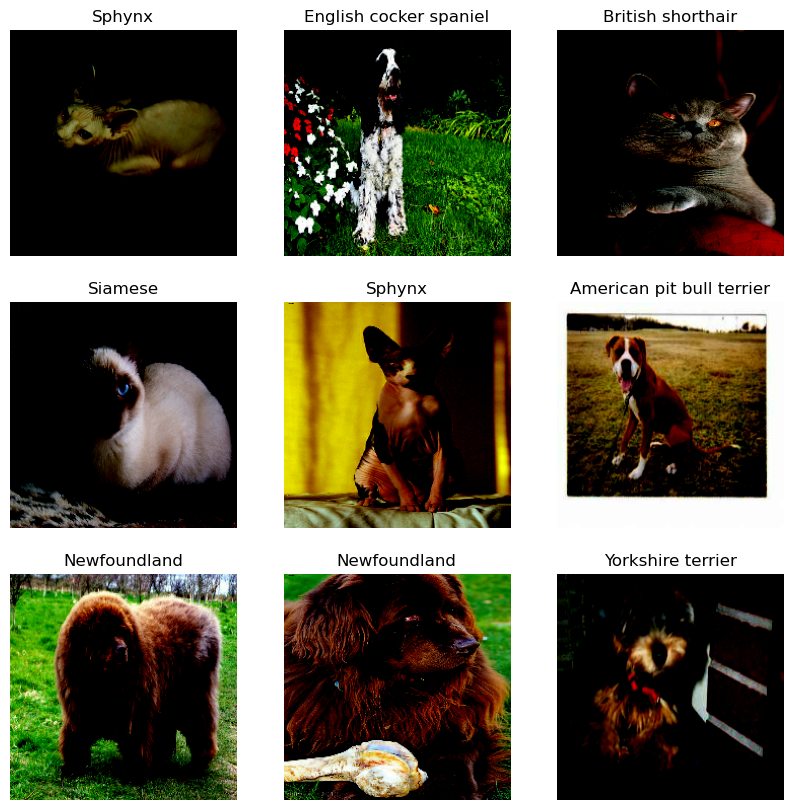

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (X, y) in enumerate(train_dataset.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    # Clip the pixel values to [0, 1] range before displaying
    img = tf.clip_by_value(X, clip_value_min=0.0, clip_value_max=1.0)
    plt.imshow(img)
    plt.title(metadata.features['label'].int2str(y).replace('_', ' ').capitalize())
    plt.axis("off")

plt.show()
